DATA ANALYSIS OF STORE SALES DATASET

In [70]:
#importing neccesary libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [71]:
#loading the dataset
dt = pd.read_csv('E:\\coding\\venv\\DA PROJECTS\\DA SSD\\DATA-ANALYSIS----STORE-SALES-\\retail_store_sales.csv')

In [72]:
dt.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [73]:
dt.shape

(12575, 11)

In [74]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [75]:
dt.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [76]:
dt[dt.isnull().any(axis=1)]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
11,TXN_5422631,CUST_09,Milk Products,NaN,NaN,8.0,52.0,Digital Wallet,In-store,2025-01-12,True
14,TXN_2490363,CUST_09,Milk Products,Item_16_MILK,27.5,2.0,55.0,Digital Wallet,Online,2022-05-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12564,TXN_2153066,CUST_17,Electric household essentials,NaN,29.0,NaN,NaN,Digital Wallet,In-store,2024-03-28,False
12568,TXN_1096134,CUST_06,Food,Item_4_FOOD,9.5,8.0,76.0,Digital Wallet,In-store,2022-06-11,NaN
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN


In [77]:
dt_noduplicates = dt.drop_duplicates()
dt.shape

(12575, 11)

In [78]:
# Fill missing 'Price Per Unit' by dividing 'Total Spent' by 'Quantity'
dt.loc[dt['Price Per Unit'].isnull(), 'Price Per Unit'] = (
    dt.loc[dt['Price Per Unit'].isnull(), 'Total Spent'] / dt.loc[dt['Price Per Unit'].isnull(), 'Quantity'])

In [79]:
dt.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit         0
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [80]:
# Show records where 'Quantity' is null
dt[dt['Quantity'].isnull()]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
15,TXN_1809665,CUST_14,Beverages,NaN,24.5,NaN,NaN,Credit Card,In-store,2022-05-11,NaN
19,TXN_4206593,CUST_01,Furniture,NaN,35.0,NaN,NaN,Digital Wallet,Online,2025-01-13,False
25,TXN_3481599,CUST_05,Furniture,NaN,39.5,NaN,NaN,Cash,Online,2022-09-08,False
34,TXN_1621497,CUST_06,Patisserie,NaN,23.0,NaN,NaN,Cash,In-store,2023-02-18,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12527,TXN_1069238,CUST_23,Food,NaN,5.0,NaN,NaN,Digital Wallet,In-store,2022-08-13,False
12552,TXN_4823896,CUST_05,Milk Products,NaN,8.0,NaN,NaN,Cash,In-store,2022-07-21,False
12556,TXN_4397672,CUST_04,Beverages,NaN,41.0,NaN,NaN,Credit Card,Online,2024-11-28,True
12562,TXN_7422454,CUST_07,Butchers,NaN,33.5,NaN,NaN,Cash,Online,2023-04-15,NaN


In [81]:
# Drop records where 'Quantity' is null
dt = dt.dropna(subset=['Quantity'])
dt.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                 609
Price Per Unit         0
Quantity               0
Total Spent            0
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    3988
dtype: int64

In [82]:
dt_nonan = dt.dropna()
dt_nonan.shape

(7579, 11)

In [83]:
d = dict(dt_nonan['Item'].groupby([ dt_nonan['Category'],dt_nonan['Price Per Unit']]).unique())
d[('Patisserie',20.0)]

array(['Item_11_PAT'], dtype=object)

In [84]:
# Show records where 'Item' is null
dt[dt['Item'].isnull()]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
5,TXN_7482416,CUST_09,Patisserie,NaN,20.0,10.0,200.0,Credit Card,Online,2023-11-30,NaN
11,TXN_5422631,CUST_09,Milk Products,NaN,6.5,8.0,52.0,Digital Wallet,In-store,2025-01-12,True
17,TXN_9634894,CUST_15,Milk Products,NaN,27.5,10.0,275.0,Digital Wallet,Online,2022-04-17,NaN
21,TXN_8685338,CUST_15,Milk Products,NaN,35.0,3.0,105.0,Credit Card,In-store,2023-10-29,NaN
32,TXN_1543244,CUST_20,Food,NaN,24.5,8.0,196.0,Credit Card,Online,2024-10-25,True
...,...,...,...,...,...,...,...,...,...,...,...
12435,TXN_5147764,CUST_01,Furniture,NaN,6.5,5.0,32.5,Credit Card,Online,2023-09-06,True
12457,TXN_1352194,CUST_17,Electric household essentials,NaN,21.5,4.0,86.0,Credit Card,Online,2023-02-26,NaN
12477,TXN_5625684,CUST_22,Computers and electric accessories,NaN,20.0,4.0,80.0,Cash,In-store,2022-11-09,True
12491,TXN_7894525,CUST_23,Butchers,NaN,26.0,1.0,26.0,Credit Card,Online,2023-01-31,True


In [85]:
for i in d:
    for j in d[i]:
        dt.loc[(dt['Item'].isnull()) & (dt['Category'] == i[0]) & (dt['Price Per Unit'] == i[1]), 'Item'] = j

In [86]:
dt.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                   0
Price Per Unit         0
Quantity               0
Total Spent            0
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    3988
dtype: int64

In [87]:
#removing columns 'Discount Applied'  as  that is useful for analysis
dt = dt.drop(columns=['Discount Applied'])

In [88]:
dt.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02


In [89]:
#removing duplicates
dt = dt.drop_duplicates()
dt.shape

(11971, 10)

In [90]:
#changing datatype of 'Transaction Date' to datetime
dt['Transaction Date'] = pd.to_datetime(dt['Transaction Date'])
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11971 entries, 0 to 12574
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    11971 non-null  object        
 1   Customer ID       11971 non-null  object        
 2   Category          11971 non-null  object        
 3   Item              11971 non-null  object        
 4   Price Per Unit    11971 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    11971 non-null  object        
 8   Location          11971 non-null  object        
 9   Transaction Date  11971 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 1.0+ MB


In [116]:
dt.to_csv('E:\\coding\\venv\\DA PROJECTS\\DA SSD\\DATA-ANALYSIS----STORE-SALES-\\cleaned_retail_store_sales.csv', index=False)

DATA VISUALIZATION

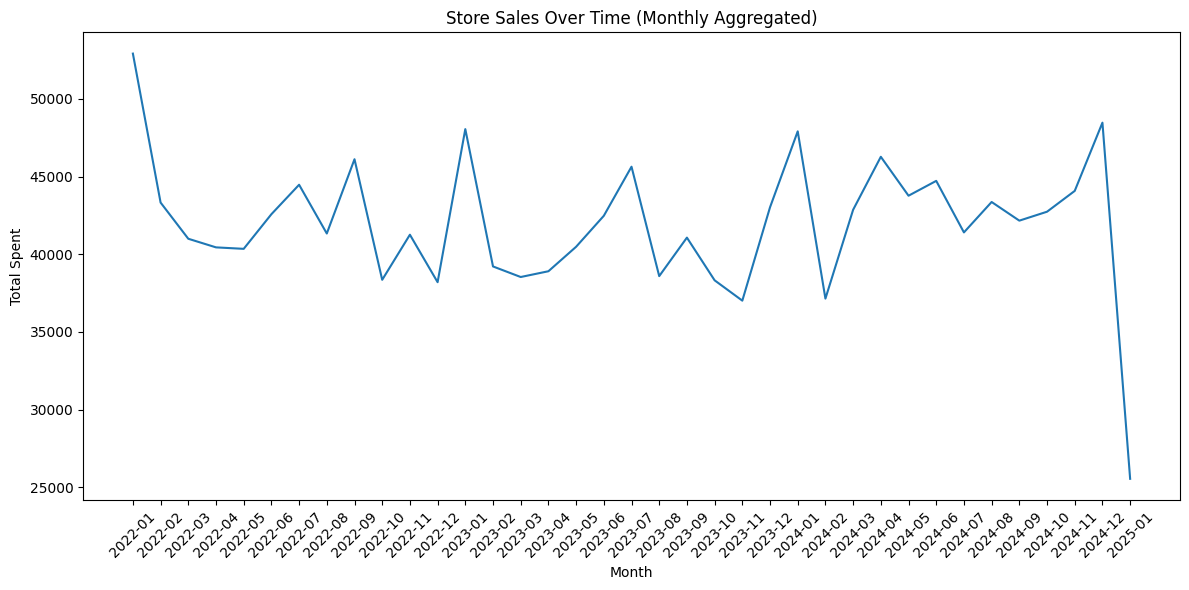

In [91]:
# Monthly aggregation
monthly_sales = dt.groupby(dt['Transaction Date'].dt.to_period('M'))['Total Spent'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.title('Store Sales Over Time (Monthly Aggregated)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


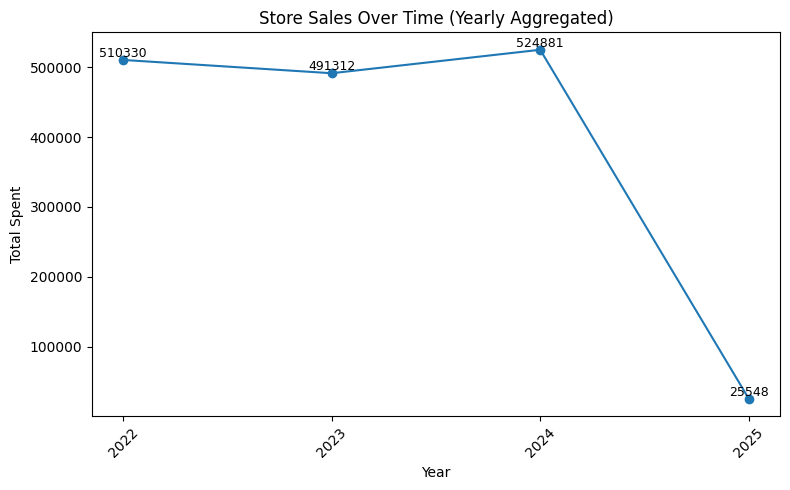

In [93]:
# Yearly aggregation
yearly_sales = dt.groupby(dt['Transaction Date'].dt.to_period('Y'))['Total Spent'].sum()

plt.figure(figsize=(8, 5))
plt.plot(yearly_sales.index.astype(str), yearly_sales.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Spent')
plt.title('Store Sales Over Time (Yearly Aggregated)')
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels
for x, y in zip(yearly_sales.index.astype(str), yearly_sales.values):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=9)

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_25716\4059129796.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='deep')


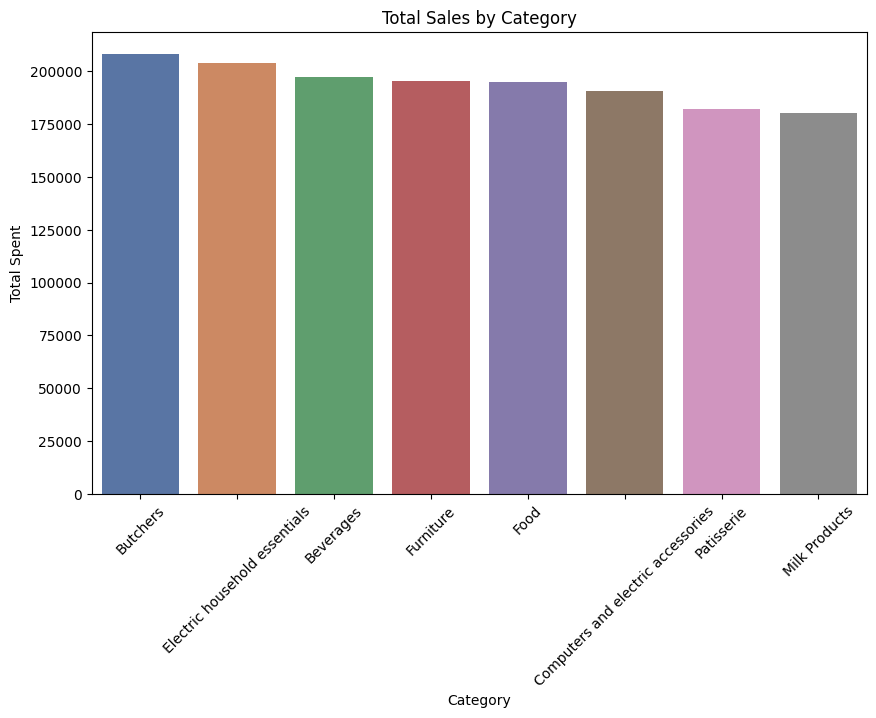

In [107]:
#sales by Category
category_sales = dt.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='deep')
plt.xlabel('Category')
plt.ylabel('Total Spent')
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()

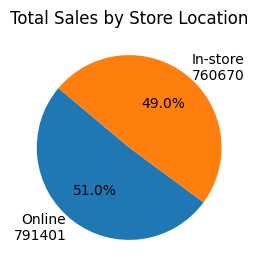

In [115]:
# Pie chart with data labels for total sales by Store Location
location_sales = dt.groupby('Location')['Total Spent'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 3))
plt.pie(
    location_sales.values,
    labels=[f"{loc}\n{val:.0f}" for loc, val in zip(location_sales.index, location_sales.values)],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Total Sales by Store Location')
plt.show()